# Task 6 - Prediction Using Decision Trees

## Gaurav Singh

### Predicting the type of Species using Decision Tree Model

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve,cross_val_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import classification_report

In [66]:
indir = 'D:/Internship/GRIP/Task 6/Dataset/Iris.csv'
df = pd.read_csv(indir)

# Data Exploration

In [67]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [70]:
df.shape

(150, 6)

In [71]:
# Check for empty strings in the dataset
(df.select_dtypes(include='object') =="").sum().sum()

0

In [72]:
# Check for null values in the dataset
df.isna().sum().sum()

0

In [73]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

0

In [74]:
# Drop the Id column
df.drop('Id',axis=1,inplace=True)2

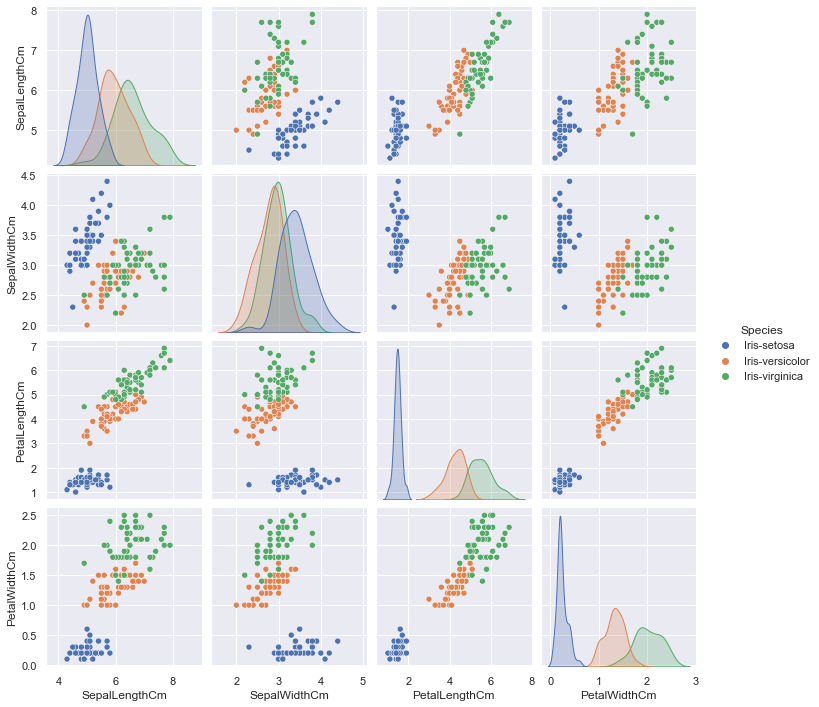

In [75]:
sns.pairplot(df, hue='Species')

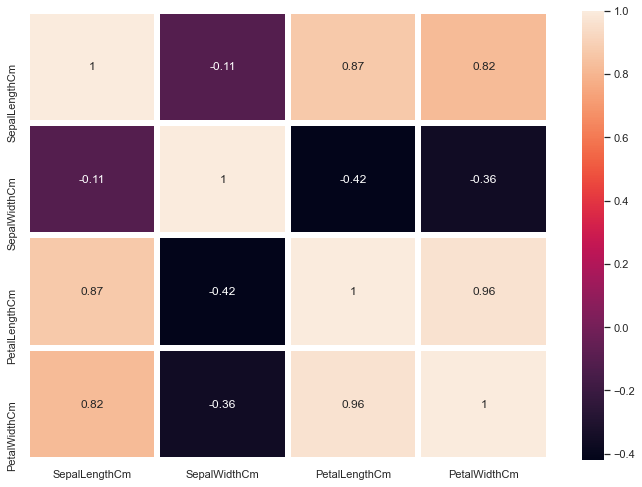

In [76]:
corr = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr() # compute correlation matrix
sns.heatmap(corr, annot = True,linewidth=5,xticklabels=corr.columns,yticklabels=corr.columns);

# Decision Tree Model

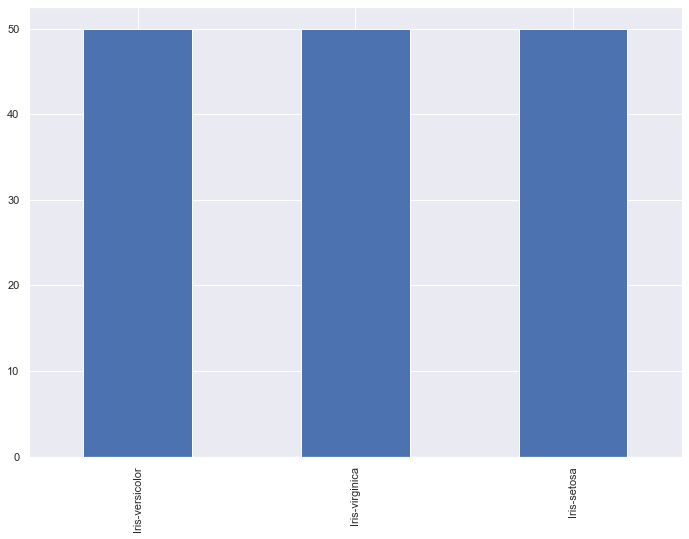

In [77]:
# Balanced Dataset
df['Species'].value_counts().plot.bar();

In [78]:
X = df.drop('Species',axis = 1).values
y = df['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [79]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [80]:
print('Accuracy: ', cross_val_score(clf, X, y, cv=5).mean().round(2)*100, '%')

Accuracy:  97.0 %


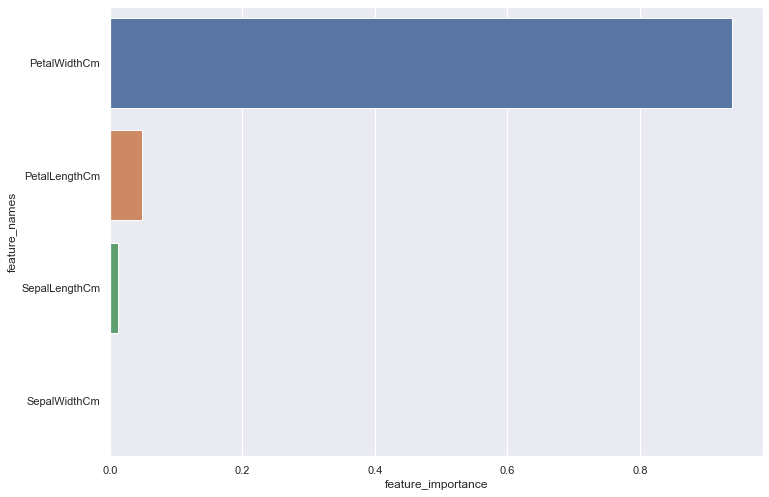

In [81]:
f_imp = clf.feature_importances_
f_names = np.array(df.drop('Species',axis = 1).columns.values)
data = {'feature_names':f_names,'feature_importance':f_imp}
df_feature2 = pd.DataFrame(data)
df_feature2.sort_values(by=['feature_importance'], ascending=False,inplace=True)
sns.barplot(x=df_feature2['feature_importance'], y=df_feature2['feature_names']);

In [82]:
# generate the data; average the values
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

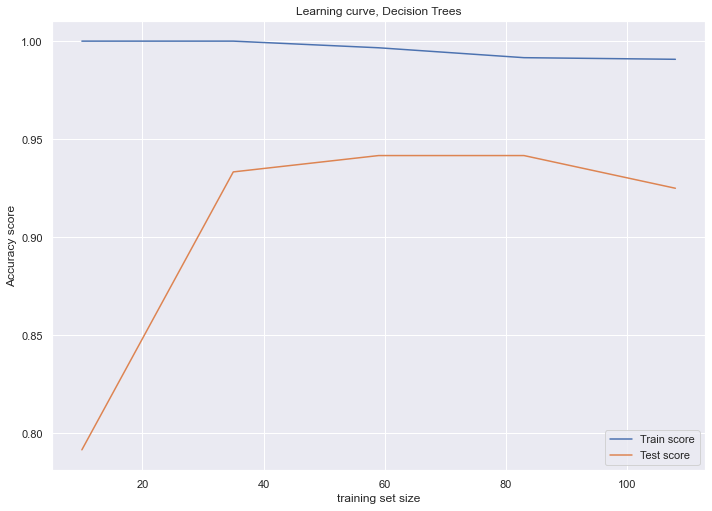

In [83]:
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='Train score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('training set size')
plt.ylabel('Accuracy score')
plt.title('Learning curve, Decision Trees')
plt.legend();

In [84]:
target_names = np.unique(df['Species'].values)
dot_data = export_graphviz(clf, precision=2,
feature_names=df.drop('Species',axis = 1).columns.values,
proportion=True,
class_names=target_names,
filled=True, rounded=True,
special_characters=True)

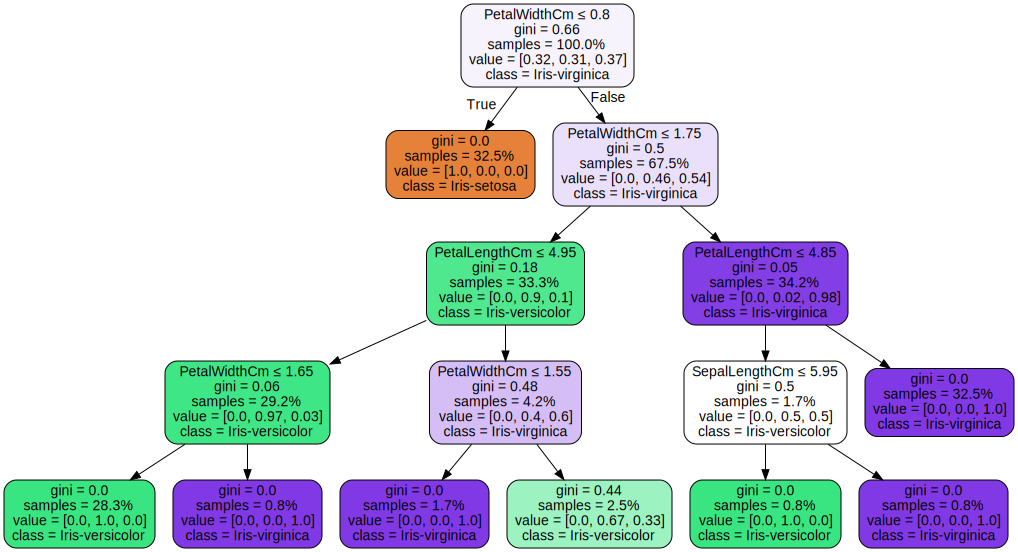

In [85]:
graph = graphviz.Source(dot_data)
graph

In [86]:
X_new = np.array([[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]])

In [87]:
clf.predict(X_new)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)